------------------------------------------------------------------------
<center>

# Business Understanding:

## Bank Marketing
</center>

*Discentes:*

    *   Arthur Bezerra Calado
    *   Gabriel D'assumpção de Carvalho
    *   Pedro Henrique Sarmento de Paula

*Data:* 04/07/2024

------------------------------------------------------------------------

------------------------------------------------------------------------

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Introdução

<p style="text-align: justify">
O marketing é um conjunto de técnicas e métodos aplicados ao estudo das necessidades dos mercados, funcionando como um mecanismo essencial para potencializar os negócios. As organizações utilizam estratégias variadas para se comunicar diretamente com os clientes, seja por meio de redes sociais, outdoors ou telemarketing, visando alcançar objetivos específicos. No contexto do setor bancário, um dos desafios mais significativos é garantir a eficácia das campanhas de marketing para atrair novos clientes e reter os existentes. A base de dados disponível no UC Irvine Machine Learning Repository se concentra no marketing direto realizado por um banco português, com o propósito de avaliar o sucesso das campanhas de depósito a prazo.
</p>

<p style="text-align: justify">
O telemarketing, como forma de marketing direto, pode ser percebido como invasivo. Por isso, é crucial identificar se o cliente potencial realmente se enquadra no perfil desejado pela empresa, porque nos dias atuais os clientes "adoram compartilhar histórias, boas e ruins, sobre suas experiências de consumo" (KOTLER, 2017, p. 21). O objetivo do marketing é maximizar a retenção de clientes e incentivar a recompra de produtos ou serviços da empresa. Assim, as técnicas de marketing visam selecionar o melhor conjunto de clientes, aqueles mais propensos a se interessar pelo produto oferecido.
</p>

<p style="text-align: justify">
O telemarketing é amplamente reconhecido como um método invasivo de marketing, e essa percepção tem levado a uma diminuição crescente na sua popularidade. Uma análise do termo "telemarketing" no Google Trends revela uma tendência decrescente ao longo dos anos.
</p>


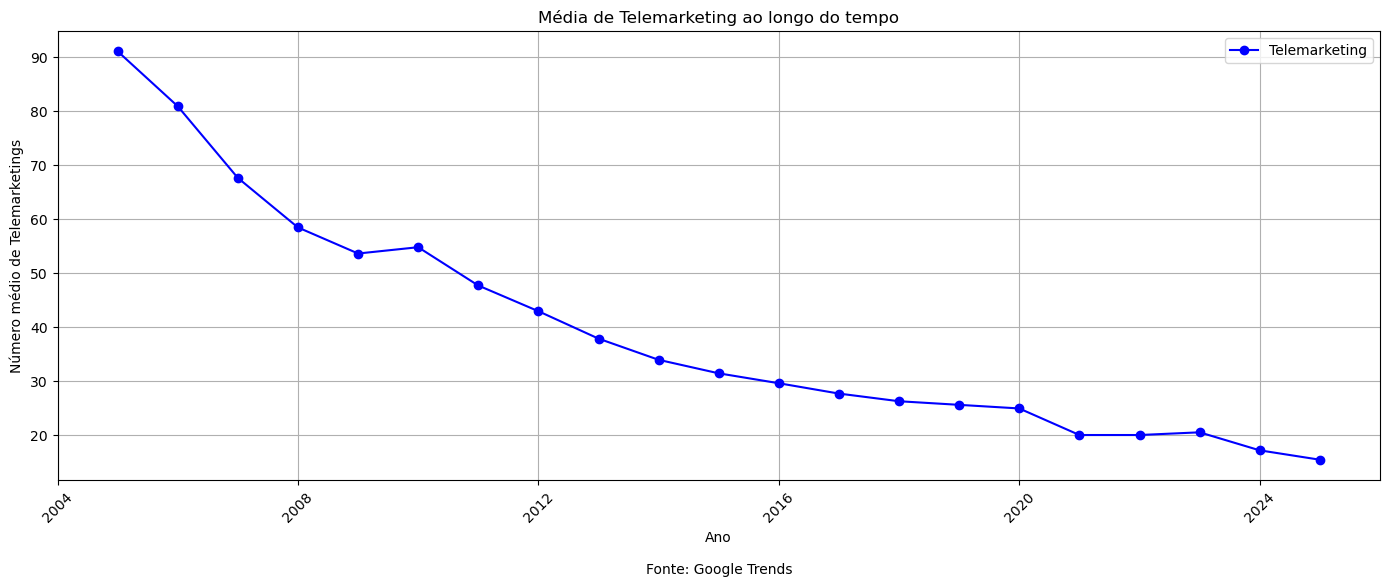

In [94]:
# Caminho para o arquivo CSV
st_tm_path = 'https://raw.githubusercontent.com/gabrieldadcarvalho/machine_learning/main/pjt_final/telemarketing_2004.csv'

# Carregar o arquivo CSV com a primeira coluna como índice e parse_dates para interpretar as datas
st_tm = pd.read_csv(st_tm_path, index_col=0, parse_dates=True)

# Garantir que o índice seja do tipo datetime
st_tm.index = pd.to_datetime(st_tm.index)

# Agrupar por ano e aplicar uma função de agregação (por exemplo, média)
st_tm = st_tm.groupby(pd.Grouper(freq='Y')).mean()

# Plotar os gráficos
plt.figure(figsize=(14, 6))

# Plotar o primeiro gráfico de linha
plt.plot(st_tm.index, st_tm['telemarketing'], marker='o', linestyle='-', color='b', label='Telemarketing')
plt.title('Média de Telemarketing ao longo do tempo')
plt.xlabel('Ano')
plt.ylabel('Número médio de Telemarketings')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização
# Adicionar texto de fonte abaixo do gráfico
plt.text(0.5, -0.2, 'Fonte: Google Trends', ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)
plt.tight_layout()
plt.show()

<p style="text-align: justify">
Os dados apresentados ilustram claramente que o interesse pelo telemarketing tem declinado. Isso indica uma redução no número de pessoas interessadas em entender o funcionamento deste método ou em se envolver com ele. Esse cenário sugere que o telemarketing está perdendo espaço no mercado devido à sua natureza intrusiva.
</p>

<p style="text-align: justify">
O desafio de negócio aqui é identificar quais clientes têm maior probabilidade de aderir a um depósito bancário a prazo após uma campanha de marketing direto. Essa análise é crucial para que o banco possa direcionar eficientemente seus recursos e estratégias de marketing, concentrando-se nos clientes mais propensos à conversão. No setor bancário, o sucesso de campanhas de marketing não apenas amplia a base de clientes, mas também impulsiona significativamente os lucros.
</p>

<p style="text-align: justify">
Considerando o objetivo do marketing, é evidente que a análise de dados é uma ferramenta fundamental para a tomada de decisões, facilitando a compreensão do perfil de cada cliente. Com o avanço de métodos estatísticos e computacionais, é possível utilizar ferramentas de inteligência artificial que combinam conhecimentos de estatística multivariada e computação para a detecção de padrões. Nesse contexto, os modelos de classificação desempenham um papel crucial, permitindo obter conhecimento explicativo e preditivo a partir de dados brutos.
</p>

<p style="text-align: justify">
Existem diversos tipos de classificadores, como K-NN, Suport Vector Machine (SVM), Logistic Regression (LR), Random Forest (RF), Decision Tree (DT), Neural Network (NN) e outros. Cada um desses modelos apresenta vantagens e desvantagens. Por exemplo, SVM e NN são robustos e capazes de lidar com dados lineares e não lineares, porém podem perder a capacidade explicativa. Portanto, a escolha do modelo depende do objetivo do banco: se deseja um modelo explicativo para entender por que certos clientes são mais propensos a fazer um depósito, ou se precisa apenas de um modelo preditivo que forneça uma resposta de sucesso ou fracasso ao inserir as características do cliente.
</p>

<p style="text-align: justify">
A análise dos dados coletados entre 2008 e 2010, durante uma das maiores crises financeiras dos Estados Unidos, permite identificar padrões e características dos clientes que levaram ao sucesso das campanhas. Essa análise não só ajudará a melhorar as estratégias atuais, mas também fornecerá insights valiosos para mitigar os impactos de crises financeiras futuras, garantindo a sustentabilidade e o crescimento do banco a longo prazo. O conjunto de dados a ser analisado contém 16 variáveis categóricas e numéricas, com 41.188 observações.
</p>

| Nome da variável | Papel          | Tipo       | Demográfico           | Descrição                                                                                                                                                                                                                                                                                                                                                                                                                                         | Unidades | Valores ausentes |
|------------------|----------------|------------|-----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------|------------------|
| idade            | Característica | Inteiro    | Idade                 |                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          | Não              |
| trabalho         | Característica | Categórico | Ocupação              | Tipo de emprego (categórico: 'Admin.', 'Blue-collar', 'Entrepreneur', 'Householdant', 'Management', 'Aposentado', 'Autônomo', 'Serviços', 'Estudante', 'Técnico', 'Desempregado', 'Desconhecido')                                                                                                                                                                                                                                                 |          | Não              |
| conjugal         | Característica | Categórico | Estado civil          | estado civil (categórico: 'divorciado', 'casado', 'solteiro', 'desconhecido'; nota: 'divorciado' significa divorciado ou viúvo)                                                                                                                                                                                                                                                                                                                   |          | Não              |
| educação         | Característica | Categórico | Nível de escolaridade | (categórico: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'analfabeto', 'professional.course', 'university.degree', 'unknown')                                                                                                                                                                                                                                                                                                              |          | Não              |
| inadimplência    | Característica | Binário    |                       | tem crédito inadimplente?                                                                                                                                                                                                                                                                                                                                                                                                                         |          | Não              |
| equilíbrio       | Característica | Inteiro    |                       | saldo médio anual                                                                                                                                                                                                                                                                                                                                                                                                                                 | Euros    | Não              |
| habitação        | Característica | Binário    |                       | Tem crédito habitação?                                                                                                                                                                                                                                                                                                                                                                                                                            |          | Não              |
| empréstimo       | Característica | Binário    |                       | Tem empréstimo pessoal?                                                                                                                                                                                                                                                                                                                                                                                                                           |          | Não              |
| contato          | Característica | Categórico |                       | tipo de comunicação de contato (categórico: 'celular', 'telefone')                                                                                                                                                                                                                                                                                                                                                                                |          | Sim              |
| day_of_week      | Característica | Data       |                       | último dia de contato da semana                                                                                                                                                                                                                                                                                                                                                                                                                   |          | Não              |
| mês              | Característica | Data       |                       | último mês do ano de contato (categórico: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                                                                                                                                                                                                                                                                                                                                 |          | Não              |
| duração          | Característica | Inteiro    |                       | Duração do último contato, em segundos (numérico). Observação importante: esse atributo afeta fortemente o destino de saída (por exemplo, se duration=0 e y='no'). No entanto, a duração não é conhecida antes de uma chamada ser realizada. Além disso, após o fim da chamada y é obviamente conhecido. Assim, esse insumo só deve ser incluído para fins de benchmark e deve ser descartado se a intenção for ter um modelo preditivo realista. |          | Não              |
| campanha         | Característica | Inteiro    |                       | número de contatos realizados durante esta campanha e para este cliente (numérico, inclui último contato)                                                                                                                                                                                                                                                                                                                                         |          | Não              |
| pdays            | Característica | Inteiro    |                       | número de dias que se passaram após o cliente ter sido contatado pela última vez a partir de uma campanha anterior (numérico; -1 significa que o cliente não foi contatado anteriormente)                                                                                                                                                                                                                                                         |          | Sim              |
| anterior         | Característica | Inteiro    |                       | número de contatos realizados antes desta campanha e para este cliente                                                                                                                                                                                                                                                                                                                                                                            |          | Não              |
| presultado       | Característica | Categórico |                       | resultado da campanha de marketing anterior (categórico: 'fracasso', 'inexistente', 'sucesso')                                                                                                                                                                                                                                                                                                                                                    |          | Sim              |
| y                | Alvo           | Binário    |                       | O cliente subscreveu um depósito a prazo?                                                                                                                                                                                                                                                                                                                                                                                                         |          |                  |


<p style="text-align: justify">
Conforme observado na tabela de variáveis do nosso banco de dados, as variáveis "contato", "pdays" e "presultado" apresentam observações faltantes. Antes de proceder com a seleção do classificador, é essencial realizar uma análise exploratória para tratar dados ausentes, identificar possíveis valores atípicos, ajustar a distribuição das variáveis para melhor simetria e transformar variáveis categóricas em variáveis dummy. Além disso, considerando que os dados são do período entre 2008 e 2010, pode haver desafios na aplicação de modelos para classificar novas observações com precisão.
</p>

<p style="text-align: justify">
Com mais de 41 mil observações, a busca por um modelo otimizado entre os classificadores mencionados no parágrafo anterior demanda recursos adequados. Isso inclui hardware e software robustos, além de suporte de TI para instalação de pacotes, manutenção preventiva e atualizações de software necessárias para análise de dados. Recursos adequados são cruciais para lidar com a quantidade volumosa de dados e garantir eficiência e precisão nas análises.
</p>

<p style="text-align: justify">
Além dos recursos mencionados, é fundamental decidir se o modelo será ajustado uma única vez com os dados de "bank marketing" ou se será desenvolvido um Data Warehouse. Um Data Warehouse permitirá armazenar todas as informações estruturadas dos clientes, facilitando atualizações e melhorias contínuas do modelo ao longo do tempo. Isso reduzirá a dependência de dados de terceiros e aumentará a precisão na classificação dos clientes recorrentes da empresa, proporcionando uma base sólida para estratégias futuras de marketing e análise de clientes.
</p>

<p style="text-align: justify">
Em resumo, este estudo visa utilizar o software Python para coleta de dados, análise e estimação de modelos de classificação, com o objetivo de maximizar os depósitos a prazo captados pelo telemarketing do banco. Portanto, é crucial definir métricas claras para avaliar o desempenho do projeto. Algumas das métricas propostas incluem:
</p>

<ul>
    <li>Taxa de crescimento de depósitos a prazo;</li>
    <li>Taxa de retenção de clientes;</li>
    <li>Comparação do custo atual de aquisição de novos clientes com o custo pós-implementação do modelo;</li>
    <li>Estimativa do Retorno sobre o Investimento (ROI).</li>
</ul>

# Referência Bibliográfica

KOTLER, Philip; KARTAJAYA, Hermawan; SETIAWAN, Iwan. **Marketing 4.0: do tradicional ao digital**. Rio de Janeiro: Sextante, 2017.